### 필수과제1: 로그 스케일링
- 데이터간 편차를 줄여 왜도(skewness)와 첨도(kurtosis)를 줄일 수 있기 때문에 정규성이 높아진다
- 왜도가 클 경우 상대적으로 꼬리 쪽에 있는 데이터의 중요도가 낮아진다. 만약 꼬리 쪽의 소수의 데이터가 유의미하다면 모델의 성능이 낮아질 것이다. 
- 따라서 왜도를 줄이는 것이 데이터를 분석할 때 중요한 요소 중 하나이다. 왜도를 줄이는 쉽고 빠른 방법 중 하나가 로그 스케일링이다.
- 큰 수치를 같은 비율의 작은 수치로 변환하는 것
- 예를 들어, 100을 상용로그를 취하면 2가된다.
- 복잡한 계산을 간편하게 위할 경우도 사용된다.
- 구체적으로 로그의 성질에 의해 곱하기가 더하기로, 나누기가 빼기로 바뀐다.

### 왜도 (skewness)
- 분포의 정규분포에 비해서 얼마나 비대칭성을 나타내는 척도이다.
- 왜도 값이 양의 값을 가지면(Positive Skewness) - 정규 분포보다 오른쪽에 위치,
- 음을 값을 가지면(Negative Skewness) - 정규 분포보다 왼쪽에 위치


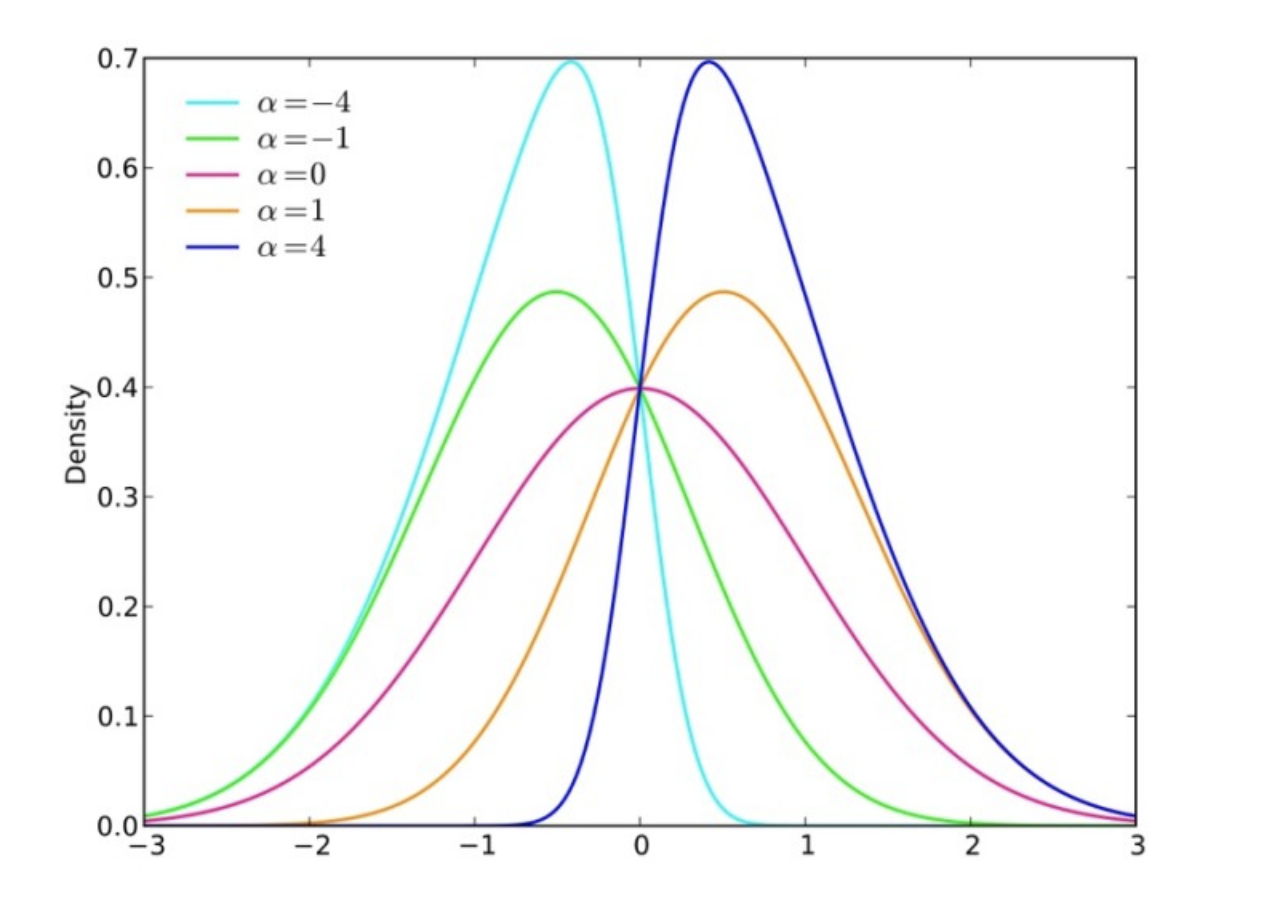

### 첨도(kurtosis)
- 샘플의 점수가 평균을 중심으로 가까이 몰려 있을수록 분포의 정점은 더욱 뾰족하다.
- 이 뾰족함이 의미하는 것이 첨도이고 
- 분산도가 크면 집단이 이질적이고 분포의 높이가 낮아지고, 
- 분산도가 작으면 집단이 동질적이고 분포의 높이가 높아진다.

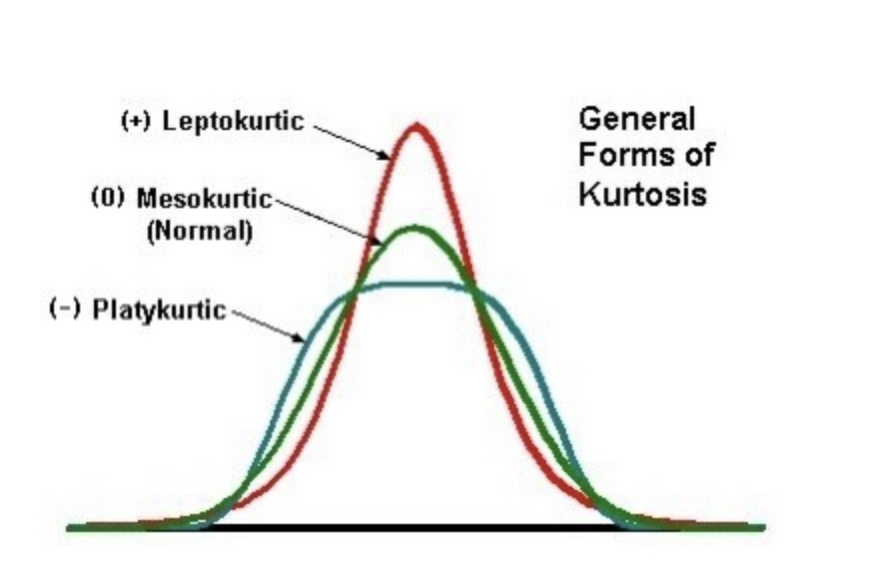

#### 로그스케일링과 다른 스케일링의 차이?
- 개별 feature, 또는 target의 분포도가 skew가 심하면 log변환을 한다.
- standard scaler는 일반적으로 선형기반의 ML의 input 데이터 전체에 대해 적용
- 보통 scaling은 전체 feature들에 대해 모두 적용
- 따라서 skew가 심하면 로그 스케일링, 전체 데이터의 스케일링을 표준정규분포 형태로 맞추고 싶다면 standard scaler 적용

### 로그 스케일링을 하는 이유
- 단위(scale)의 문제
- 모형(model)의 문제
- 데이터 생성 과정(DGP)의 문제

In [4]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import FinanceDataReader as fdr

In [3]:
df_krx = fdr.StockListing('KRX')
df_krx

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,63000,1,700,1.12,62700,63300,62300,18278602,1147804584500,376096300650000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,569000,2,-6000,-1.04,577000,578000,556000,317648,179941076000,133146000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,87300,2,-1200,-1.36,89100,90700,86700,4670908,412119310916,63554606464500,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,797000,2,-1000,-0.13,795000,805000,792000,28390,22648893000,56725678000000,71174000,STK
4,006400,KR7006400006,삼성SDI,KOSPI,,719000,2,-27000,-3.62,741000,741000,712000,266419,192270585000,49441697070000,68764530,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,056000,KR7056000003,코원플레이,KOSDAQ,투자주의환기종목(소속부없음),90,2,-27,-23.08,100,120,90,13801204,1336311876,1774820250,19720225,KSQ
2704,267060,KR7267060002,명진홀딩스,KONEX,일반기업부,181,0,0,0.00,0,0,0,0,0,1654666524,9141804,KNX
2705,308700,KR7308700004,테크엔,KONEX,일반기업부,320,2,-26,-7.51,319,320,310,1102,342540,1280000000,4000000,KNX
2706,267810,KR7267810000,앙츠,KONEX,일반기업부,700,2,-393,-35.96,301,700,200,27023,13252193,1250900000,1787000,KNX


array([[<Axes: title={'center': 'Changes'}>,
        <Axes: title={'center': 'ChagesRatio'}>,
        <Axes: title={'center': 'Open'}>],
       [<Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Volume'}>],
       [<Axes: title={'center': 'Amount'}>,
        <Axes: title={'center': 'Marcap'}>,
        <Axes: title={'center': 'Stocks'}>]], dtype=object)

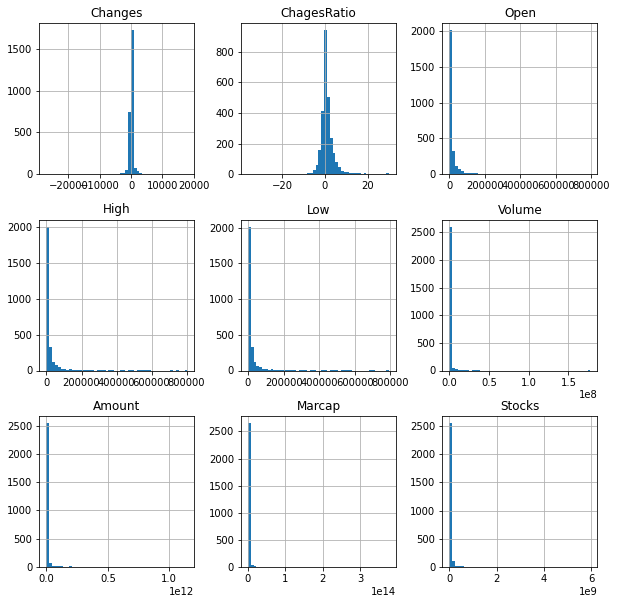

In [20]:
df_krx.hist(bins = 50, figsize = (10, 10))

- 거의 대다수들의 값들이 좌측에 몰려 있음
- 따라서 분포를 좀 더 정규분포의 형태로 바꿔주기 위해 각 데이터에 log를 취해 log scaling을 진행

In [12]:
df_krx_ = df_krx[['Open', 'High', 'Low', 'Volume', 'Amount', 'Marcap', 'Stocks']]
# 데이터의 skew가 심해보이는 것 추출출

In [5]:
from scipy.stats import skew, kurtosis

In [15]:
# 왜도
skew(df_krx_)

array([ 7.54439774,  7.49744514,  7.54685779, 32.4515158 , 14.02119395,
       36.91603646, 31.34486166])

In [14]:
# 첨도
kurtosis(df_krx_, fisher = True)

array([  73.54887359,   72.80609884,   73.83462286, 1366.03026254,
        253.5800232 , 1606.41412587, 1314.76499425])

In [16]:
import numpy as np
log_df = np.log(df_krx_) # 추출한 데이터 셋에 대해 log scaling
log_df 

/usr/local/lib/python3.9/dist-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,Open,High,Low,Volume,Amount,Marcap,Stocks
0,11.046117,11.055641,11.039717,16.721242,27.768872,33.560866,22.509976
1,13.265598,13.267329,13.228524,12.668699,25.915895,32.522467,19.270832
2,11.397515,11.415313,11.370209,15.356864,26.744579,31.782921,20.405815
3,13.586097,13.598598,13.582317,10.253792,23.843377,31.669248,18.080638
4,13.515756,13.515756,13.475833,12.492826,25.982170,31.531815,18.046199
...,...,...,...,...,...,...,...
2703,4.605170,4.787492,4.499810,16.440266,21.013179,21.296965,16.797155
2704,-inf,-inf,-inf,-inf,-inf,21.226865,16.028368
2705,5.765191,5.768321,5.736572,7.004882,12.744144,20.970126,15.201805
2706,5.707110,6.551080,5.298317,10.204444,16.399674,20.947129,14.396049


ValueError: ignored

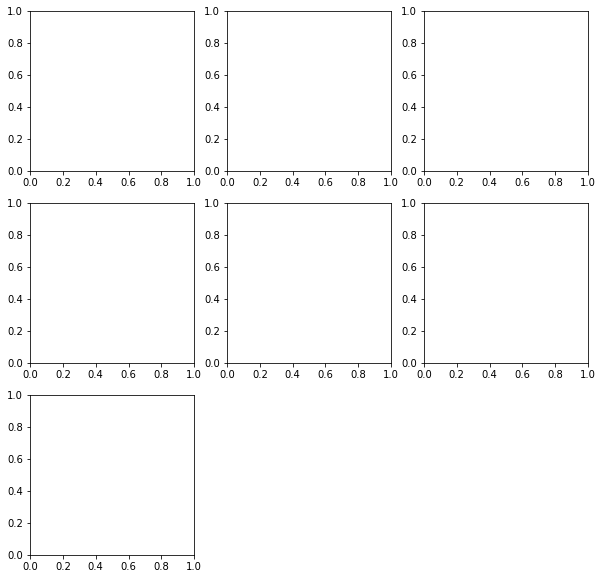

In [17]:
log_df.hist(bins = 50, figsize = (10, 10)) # plot이 그려지지 않음음

### 로그변환의 한계 1 : 원본데이터 0에 log를 취하면 -inf가 된다.
- log(0)값은 음수로 발산하기 때문에 -inf
- 히스토그램의 x축을 정할 수 없기 때문에 그래프를 그릴 수 없었음

In [18]:
log_df.describe() 

,Open,High,Low,Volume,Amount,Marcap,Stocks
count,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000
mean,-inf,-inf,-inf,-inf,-inf,25.657583,16.780955
std,NaN,NaN,NaN,NaN,NaN,1.496176,1.226802
min,-inf,-inf,-inf,-inf,-inf,20.526178,11.606889
25%,7.887959,7.904242,7.866626,9.828495,18.540259,24.800949,16.114024
50%,8.796339,8.817298,8.779557,11.295650,19.972173,25.521678,16.782401
75%,9.708081,9.723613,9.685642,12.626910,21.717721,26.389730,17.512375
max,13.586097,13.598598,13.582317,18.995219,27.768872,33.560866,22.509976


### 로그변환의 한계 2 : 원본데이터가 음수일 경우 log를 취할 수가 없다.

In [22]:
print("원본 데이터에서의 결측치 존재 칼럼 :",
      df_krx_.columns[df_krx_.isnull().any()], '\n')
print("log변환 데이터에서의 결측치 존재 칼럼 :",
      log_df.columns[log_df.isnull().any()], '\n')

log_df.info() # 이 데이터에서는 음수의 데이터는 존재하지 않았었음.

원본 데이터에서의 결측치 존재 칼럼 : Index([], dtype='object') 

log변환 데이터에서의 결측치 존재 칼럼 : Index([], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2708 entries, 0 to 2707
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2708 non-null   float64
 1   High    2708 non-null   float64
 2   Low     2708 non-null   float64
 3   Volume  2708 non-null   float64
 4   Amount  2708 non-null   float64
 5   Marcap  2708 non-null   float64
 6   Stocks  2708 non-null   float64
dtypes: float64(7)
memory usage: 148.2 KB


### 로그변환의 단점, 한계를 보완하는 방법
- 로그변환을 사용해도 문제가 없는 컬럼에만 적용한다.
- 문제가 될만한 음수, 0, 0에 수렴하는 양수 값등을 다른 값으로 대체한다.
- np.log1p 


In [24]:
# 데이터 전체에 1을 더한 후 로그 스케일링 사용
log_df = np.log1p(df_krx_)
log_df

,Open,High,Low,Volume,Amount,Marcap,Stocks
0,11.046133,11.055656,11.039733,16.721242,27.768872,33.560866,22.509976
1,13.265599,13.267331,13.228525,12.668702,25.915895,32.522467,19.270832
2,11.397526,11.415324,11.370221,15.356864,26.744579,31.782921,20.405815
3,13.586099,13.598599,13.582318,10.253827,23.843377,31.669248,18.080638
4,13.515757,13.515757,13.475835,12.492829,25.982170,31.531815,18.046199
...,...,...,...,...,...,...,...
2703,4.615121,4.795791,4.510860,16.440266,21.013179,21.296965,16.797155
2704,0.000000,0.000000,0.000000,0.000000,0.000000,21.226865,16.028368
2705,5.768321,5.771441,5.739793,7.005789,12.744147,20.970126,15.201805
2706,5.710427,6.552508,5.303305,10.204481,16.399674,20.947129,14.396049


array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Amount'}>,
        <Axes: title={'center': 'Marcap'}>],
       [<Axes: title={'center': 'Stocks'}>, <Axes: >, <Axes: >]],
      dtype=object)

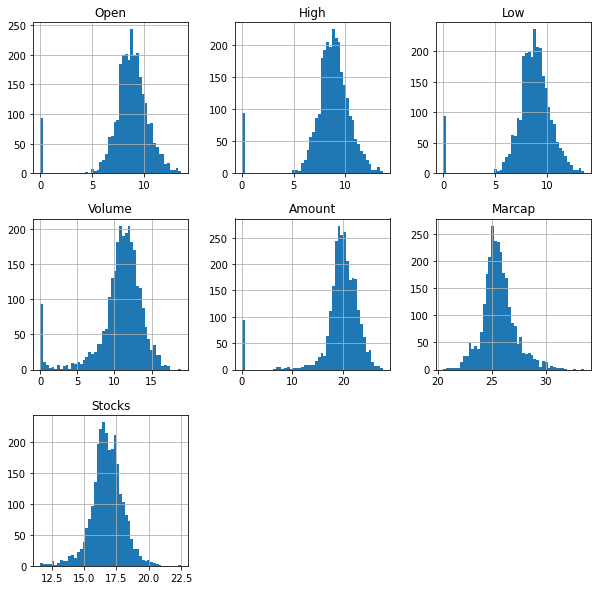

In [26]:
log_df.hist(bins = 50, figsize = (10, 10))

In [28]:
# 로그 스케일링 후 왜도와 첨도
print(skew(log_df))
print(kurtosis(log_df, fisher = True))

[-2.0524777  -2.07012298 -2.04855007 -1.62415162 -2.78385193  0.61528466
 -0.35205707]
[6.97362438 7.05483399 6.94232137 3.60017221 9.64863012 1.63158611
 1.64796337]


In [29]:
# 로그 스케일링 전 왜도와 첨도
print(skew(df_krx_))
print(kurtosis(df_krx_, fisher = True))

[ 7.54439774  7.49744514  7.54685779 32.4515158  14.02119395 36.91603646
 31.34486166]
[  73.54887359   72.80609884   73.83462286 1366.03026254  253.5800232
 1606.41412587 1314.76499425]


### 로그 스케일링의 장점
- 왜곡된 데이터를 정상에 가깝게 변환
- 독립변수와 종속변수 간의 선형성을 향상
- 통계분석의 유효성을 높임